### Задание

Самостоятельно напишите нейронную сеть, которая может стать составной частью системы бота для игры в "Крестики-нолики". Используя подготовленную базу изображений, создайте и обучите нейронную сеть, распознающую две категории изображений: крестики и нолики. Добейтесь точности распознавания более 95% (accuracy)


In [ ]:
# Подключение класса для создания нейронной сети прямого распространения
from tensorflow.keras.models import Sequential 
# Подключение класса для создания полносвязного слоя
from tensorflow.keras.layers import Dense 
# Подключение оптимизатора
from tensorflow.keras.optimizers import Adam 
# Подключение утилит для to_categorical
from tensorflow.keras import utils 
# Подключение библиотеки для загрузки изображений
from tensorflow.keras.preprocessing import image 
# Подключение библиотеки для работы с массивами
import numpy as np
# Подключение модуля для работы с файлами
import os
# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt 
from PIL import Image 
# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline 

In [ ]:
# Загрузка датасета из облака
import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l3/hw_pro.zip', None, quiet=True)

'hw_pro.zip'

In [ ]:
a

In [ ]:
# Распаковываем архив hw_light.zip в папку hw_light
!unzip -q hw_pro.zip

replace hw_pro/0/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace hw_pro/0/10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace hw_pro/0/11.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace hw_pro/0/12.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace hw_pro/0/13.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace hw_pro/0/14.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace hw_pro/0/15.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace hw_pro/0/16.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace hw_pro/0/17.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace hw_pro/0/18.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace hw_pro/0/19.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace hw_pro/0/2.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace hw_pro/0/2.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
# Путь к директории с базой
base_dir = '/content/hw_pro'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                         target_size=(img_height, img_width),
                                                         color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        else:
            y_train.append(1)
# Преобразование в numpy-массив загруженных изображений и меток классов
x_train = np.array(x_train)
y_train = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train', x_train.shape)
print('Размер массива y_train', y_train.shape)

Размер массива x_train (102, 20, 20, 1)
Размер массива y_train (102,)


In [ ]:
y_train[62]

0

In [ ]:
x_train_mod = x_train.reshape(102, 20, 20)

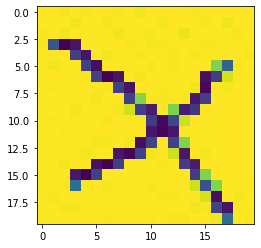

In [ ]:
# Номер картинки
n = 98

# Отрисовка картинки
plt.imshow(x_train_mod[17])

# Вывод n-й картинки
plt.show()

In [ ]:
x_train_mod_one = x_train_mod.reshape(x_train_mod.shape[0], -1)
x_train_mod_one.shape

(102, 400)

In [ ]:
x_train_mod_one = x_train_mod_one.astype('float32') / 255
x_train_mod_one

array([[0.9882353 , 1.        , 0.99607843, ..., 0.9882353 , 1.        ,
        1.        ],
       [1.        , 0.99607843, 0.99607843, ..., 1.        , 0.99607843,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.99607843, 1.        , 0.99607843, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.9882353 , ..., 1.        , 1.        ,
        1.        ]], dtype=float32)

In [ ]:
CLASS_COUNT = 2
y_train_mod = utils.to_categorical(y_train, CLASS_COUNT)

In [ ]:
print(y_train_mod.shape)

(102, 2)


In [ ]:
y_train_mod[0]

array([0., 1.], dtype=float32)

In [ ]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=400, activation='relu')) 

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(200, activation='relu')) 

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax')) 

In [ ]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 800)               320800    
                                                                 
 dense_10 (Dense)            (None, 200)               160200    
                                                                 
 dense_11 (Dense)            (None, 2)                 402       
                                                                 
Total params: 481,402
Trainable params: 481,402
Non-trainable params: 0
_________________________________________________________________
None


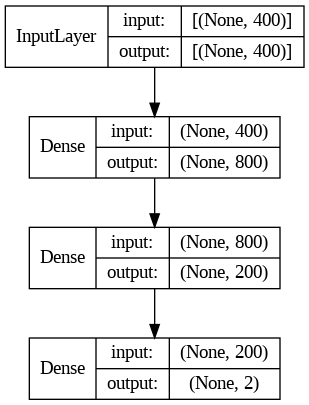

In [ ]:
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

In [ ]:
model.fit(x_train_mod_one,        # обучающая выборка, входные данные
          y_train_mod,        # обучающая выборка, выходные данные
          batch_size=102, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)      # 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/15
1/1 [==============================] - 0s 330ms/step - loss: 0.7626 - accuracy: 0.4706
Epoch 2/15
1/1 [==============================] - 0s 10ms/step - loss: 3.1188 - accuracy: 0.5098
Epoch 3/15
1/1 [==============================] - 0s 14ms/step - loss: 0.7717 - accuracy: 0.5098
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 1.6736 - accuracy: 0.4902
Epoch 5/15
1/1 [==============================] - 0s 9ms/step - loss: 1.5100 - accuracy: 0.4902
Epoch 6/15
1/1 [==============================] - 0s 9ms/step - loss: 0.8041 - accuracy: 0.4902
Epoch 7/15
1/1 [==============================] - 0s 9ms/step - loss: 0.6142 - accuracy: 0.5196
Epoch 8/15
1/1 [==============================] - 0s 8ms/step - loss: 0.9006 - accuracy: 0.5098
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.8641 - accuracy: 0.5098
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.6303 - accuracy: 0.5098
Epoch 11/15
1/1 [==================

In [ ]:
model.save_weights('model.h5')
model.load_weights('model.h5')

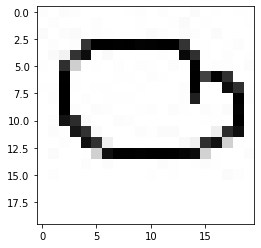

In [ ]:
# Номер тестовой цифры, которую будем распознавать
n_rec = np.random.randint(x_train_mod.shape[0])

# Отображение картинки из тестового набора под номером n_rec
plt.imshow(x_train_mod[n_rec], cmap='gray')
plt.show()

In [ ]:
# Выбор нужной картинки из тестовой выборки
x = x_train_mod_one[n_rec]

# Проверка формы данных
print(x.shape)

(400,)


In [ ]:
# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 400)


In [ ]:
prediction = model.predict(x) 
print(prediction)

1/1 [==============================] - 0s 16ms/step
[[0.4105768 0.5894232]]


In [ ]:
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')

Распознана цифра: 1
